In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
load_dotenv()

True

In [3]:
# Set monthly household income
monthly_income = 12000
print(monthly_income)

12000


In [4]:
# Current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"
btc_url = btc_url + "?format=json"
eth_url = eth_url + "?format=jason"

In [6]:
# Fetch current BTC price
current_BTC = requests.get(btc_url)

# Fetch current ETH price
current_ETH = requests.get(eth_url)

response_BTC_content = current_BTC.content
response_ETH_content = current_ETH.content
print(response_BTC_content)
print(response_ETH_content)




b'{\n\t"data": {\n\t\t"1": {\n\t\t\t"id": 1,\n\t\t\t"name": "Bitcoin",\n\t\t\t"symbol": "BTC",\n\t\t\t"website_slug": "bitcoin",\n\t\t\t"rank": 1,\n\t\t\t"circulating_supply": 18497812,\n\t\t\t"total_supply": 18497812,\n\t\t\t"max_supply": 21000000,\n\t\t\t"quotes": {\n\t\t\t\t"USD": {\n\t\t\t\t\t"price": 10439.7400000000000000,\n\t\t\t\t\t"volume_24h": 18483145604,\n\t\t\t\t\t"market_cap": 193101100328,\n\t\t\t\t\t"percentage_change_1h": -0.4118717164336650,\n\t\t\t\t\t"percentage_change_24h": -0.5498255691912180,\n\t\t\t\t\t"percentage_change_7d": -3.2244236572664600,\n\t\t\t\t\t"percent_change_1h": -0.4118717164336650,\n\t\t\t\t\t"percent_change_24h": -0.5498255691912180,\n\t\t\t\t\t"percent_change_7d": -3.2244236572664600\n\t\t\t\t}\n\t\t\t},\n\t\t\t"last_updated": 1600886371\n\t\t}\n\t},\n\t"metadata": {\n\t\t"timestamp": 1600886371,\n\t\t"num_cryptocurrencies": 1460,\n\t\t"error": null\n\t}\n}'
b'{\n\t"data": {\n\t\t"1027": {\n\t\t\t"id": 1027,\n\t\t\t"name": "Ethereum",\n\t\t\t"

In [7]:
import json
BTC_data = current_BTC.json()
ETH_data = current_ETH.json()
print(BTC_data)
print(ETH_data)



{'data': {'1': {'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'website_slug': 'bitcoin', 'rank': 1, 'circulating_supply': 18497812, 'total_supply': 18497812, 'max_supply': 21000000, 'quotes': {'USD': {'price': 10439.74, 'volume_24h': 18483145604, 'market_cap': 193101100328, 'percentage_change_1h': -0.411871716433665, 'percentage_change_24h': -0.549825569191218, 'percentage_change_7d': -3.22442365726646, 'percent_change_1h': -0.411871716433665, 'percent_change_24h': -0.549825569191218, 'percent_change_7d': -3.22442365726646}}, 'last_updated': 1600886371}}, 'metadata': {'timestamp': 1600886371, 'num_cryptocurrencies': 1460, 'error': None}}
{'data': {'1027': {'id': 1027, 'name': 'Ethereum', 'symbol': 'ETH', 'website_slug': 'ethereum', 'rank': 2, 'circulating_supply': 112724327, 'total_supply': 112724327, 'max_supply': 0, 'quotes': {'USD': {'price': 336.82, 'volume_24h': 10141623300, 'market_cap': 37972107807, 'percentage_change_1h': -0.933587088509968, 'percentage_change_24h': -1.762601911

In [8]:
print(json.dumps(BTC_data, indent=4))
print(json.dumps(ETH_data, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18497812,
            "total_supply": 18497812,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 10439.74,
                    "volume_24h": 18483145604,
                    "market_cap": 193101100328,
                    "percentage_change_1h": -0.411871716433665,
                    "percentage_change_24h": -0.549825569191218,
                    "percentage_change_7d": -3.22442365726646,
                    "percent_change_1h": -0.411871716433665,
                    "percent_change_24h": -0.549825569191218,
                    "percent_change_7d": -3.22442365726646
                }
            },
            "last_updated": 1600886371
        }
    },
    "metadata": {
        "timestamp": 1600886371,
        "nu

In [9]:
BTC_value = BTC_data["data"]["1"]["quotes"]["USD"]["price"]
print(BTC_value)

10439.74


In [10]:
my_BTC_value = BTC_value *1.2
print(my_BTC_value)

ETH_value = ETH_data["data"]["1027"]["quotes"]["USD"]["price"]
print(ETH_value)

my_ETH_value = ETH_value * 5.3
print(my_ETH_value)

12527.688
336.82
1785.146


In [11]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_BTC_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_ETH_value:0.2f}")

The current value of your 1.2 BTC is $12527.69
The current value of your 5.3 ETH is $1785.15


In [12]:
# Current amount of shares
my_agg = 200
my_spy = 50

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

# Format current date as ISO format
start_date = pd.Timestamp('2019-01-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-09-21', tz='America/New_York').isoformat()

# Set the tickers
ticker = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df = alpaca.get_barset(
    ticker,
    timeframe,
    limit=None,
    start=start_date,
    end=end_date,
    after=None,
    until=None,
).df

df.head()




AGG                                        \
                             open     high       low    close    volume   
2019-01-02 00:00:00-05:00  106.55  106.610  106.4701  106.585  10164756   
2019-01-03 00:00:00-05:00  106.57  107.075  106.5700  107.020   6260265   
2019-01-04 00:00:00-05:00  106.66  106.720  106.5500  106.695   7755476   
2019-01-07 00:00:00-05:00  106.72  106.790  106.4600  106.470   6545877   
2019-01-08 00:00:00-05:00  106.40  106.530  105.5300  106.420   3818241   

                              SPY                                     
                             open    high     low   close     volume  
2019-01-02 00:00:00-05:00  245.98  251.21  245.95  249.89  107236613  
2019-01-03 00:00:00-05:00  248.23  248.57  244.03  244.46  113782919  
2019-01-04 00:00:00-05:00  247.59  253.11  247.17  252.41  122528832  
2019-01-07 00:00:00-05:00  252.69  255.95  251.69  254.40   88317608  
2019-01-08 00:00:00-05:00  256.82  257.31  254.00  256.65   88864452

In [13]:
# Pick AGG and SPY close prices
df = df.drop(
    columns=['open', 'high', 'low', 'volume'],
    level=1
)

df.head()



,AGG,SPY
,close,close
2019-01-02 00:00:00-05:00,106.585,249.89
2019-01-03 00:00:00-05:00,107.020,244.46
2019-01-04 00:00:00-05:00,106.695,252.41
2019-01-07 00:00:00-05:00,106.470,254.40
2019-01-08 00:00:00-05:00,106.420,256.65


In [14]:
# Fetch the current closing prices from the DataFrame
agg_close_price = (df["AGG"]["close"])
spy_close_price = (df["SPY"]["close"])

df.__dict__


{'_is_copy': None,
 '_data': BlockManager
 Items: MultiIndex([('AGG', 'close'),
             ('SPY', 'close')],
            )
 Axis 1: DatetimeIndex(['2019-01-02 00:00:00-05:00', '2019-01-03 00:00:00-05:00',
                '2019-01-04 00:00:00-05:00', '2019-01-07 00:00:00-05:00',
                '2019-01-08 00:00:00-05:00', '2019-01-09 00:00:00-05:00',
                '2019-01-10 00:00:00-05:00', '2019-01-11 00:00:00-05:00',
                '2019-01-14 00:00:00-05:00', '2019-01-15 00:00:00-05:00',
                ...
                '2020-09-08 00:00:00-04:00', '2020-09-09 00:00:00-04:00',
                '2020-09-10 00:00:00-04:00', '2020-09-11 00:00:00-04:00',
                '2020-09-14 00:00:00-04:00', '2020-09-15 00:00:00-04:00',
                '2020-09-16 00:00:00-04:00', '2020-09-17 00:00:00-04:00',
                '2020-09-18 00:00:00-04:00', '2020-09-21 00:00:00-04:00'],
               dtype='datetime64[ns, America/New_York]', length=434, freq=None)
 FloatBlock: slice(0, 2, 

In [15]:
df_last = df.last("1D")
print(df_last)


                              AGG    SPY
                            close  close
2020-09-21 00:00:00-04:00  118.26  327.0


In [16]:
agg_close_price = float(df_last["AGG"]["close"])
spy_close_price = float(df_last["SPY"]["close"])
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $118.26
Current SPY closing price: $327.0


In [17]:
# Compute the current value of shares
my_spy_value = spy_close_price * int(my_spy)
my_agg_value = agg_close_price * int(my_agg)

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $16350.00
The current value of your 200 AGG shares is $23652.00


In [18]:
# Set current amount of shares data
amount_data = {
    "amount": [int(my_BTC_value) + int(my_ETH_value), int(my_spy_value) + int(my_agg_value)]
}

# Set the tickers
tickers = ["crypto", "shares"]

# Create the shares DataFrame
df_savings = pd.DataFrame(amount_data, index=tickers)

# Display shares data
df_savings

,amount
crypto,14312
shares,40002


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022D55399CD0>],
      dtype=object)

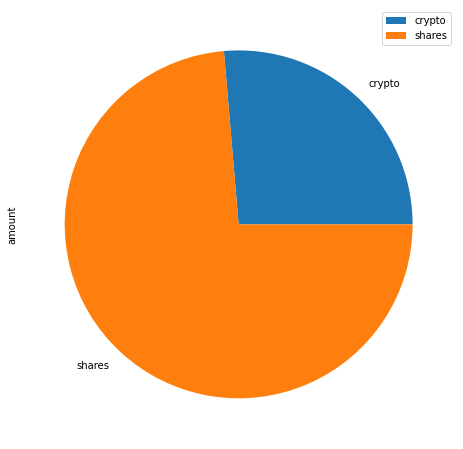

In [19]:
df_savings.plot.pie(subplots=True, figsize=(8, 8))

In [20]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
savings = my_BTC_value + my_ETH_value + my_spy_value + my_agg_value
print(savings)

# Validate saving health

if int(savings) > 36000:
        print("Congratulations for having enough money in this fund.")
elif int(savings) == 36000:
        print("Congratulations on reaching this financial goal.")
else:
        print("Sorry, but you need more money.")

54314.834
Congratulations for having enough money in this fund.


In [21]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [22]:
# Get 5 years' worth of historical data for SPY and AGG
# Set the ticker information
tickers = ["AGG","SPY"]

# Get 5 year's worth of historical price data
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_ticker.head()



AGG                                         SPY  \
                             open      high      low   close   volume    open   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167  208.16   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778  209.28   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907  208.98   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979  207.11   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173  208.73   

                                                              
                             high     low   close     volume  
2015-08-07 00:00:00-04:00  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  209.55  208.01  208.63   77197796

In [23]:
MC_even_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.6,.4],
    num_simulation = 500,
    num_trading_days = 252*30
)

# Print the simulation input data
MC_even_dist.portfolio_data.head()

AGG                                      \
                             open      high      low   close   volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [24]:
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003836,1.003329,1.019655,1.001224,1.004794,1.006686,1.008458,1.000981,1.006308,1.007058,...,1.012944,0.997724,0.996925,1.005779,0.996182,1.001052,1.002410,0.993716,1.000898,1.006559
2,1.004122,0.996472,1.017527,1.000016,1.008449,1.005879,1.020783,1.000959,1.012471,1.005110,...,1.016848,0.997552,0.997211,1.004249,1.002866,0.996211,1.003089,0.988273,0.998515,1.009111
3,1.013145,1.000888,1.020095,0.999972,1.003143,1.008904,1.036592,1.007577,1.020362,1.009344,...,1.024756,0.991350,0.989401,1.006862,1.000085,0.985873,1.002957,0.986488,1.008161,1.004316
4,1.007382,1.005560,1.012108,0.999102,0.996726,1.013863,1.031465,1.007859,1.024779,1.011236,...,1.016858,0.989265,0.991221,1.011585,1.004116,0.994492,1.003375,0.991279,1.001674,1.015396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.455422,12.479250,4.193056,3.419790,5.737735,3.639066,2.816530,5.056409,18.524750,4.203146,...,4.945932,3.417661,7.106525,5.297776,2.479083,3.775724,3.450630,2.176248,5.662695,6.223412
7557,3.439181,12.432002,4.208648,3.428332,5.760168,3.673957,2.816216,5.052964,18.559811,4.207334,...,4.941898,3.394841,7.094125,5.294187,2.468948,3.768763,3.446148,2.181745,5.621839,6.226899
7558,3.429390,12.375769,4.163525,3.404431,5.817909,3.685889,2.824539,5.090318,18.567812,4.188964,...,4.933292,3.395505,7.105065,5.328772,2.466200,3.754953,3.417002,2.150624,5.612166,6.209697
7559,3.407197,12.369191,4.182447,3.427592,5.791099,3.722822,2.838089,5.100239,18.664845,4.201775,...,4.902806,3.384791,7.080843,5.356966,2.467654,3.750490,3.423320,2.177220,5.588444,6.168537


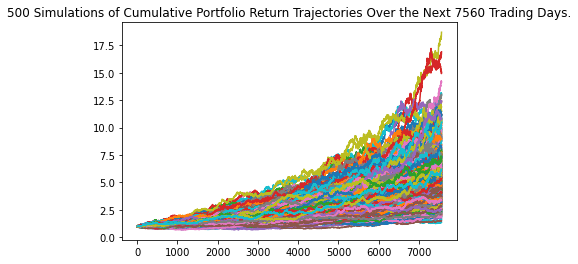

In [26]:
line_plot = MC_even_dist.plot_simulation()

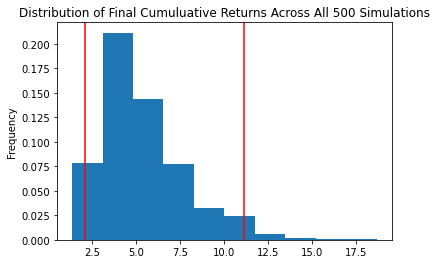

In [27]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           500.000000
mean              5.424008
std               2.465831
min               1.380046
25%               3.721740
50%               4.829958
75%               6.568927
max              18.692116
95% CI Lower      2.095260
95% CI Upper     11.144600
Name: 7560, dtype: float64


In [29]:
# Set initial investment
initial_investment = 20000

even_ci_lower = round(even_tbl[8]*20000,2)
even_ci_upper = round(even_tbl[9]*20000,2)


In [31]:
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $41905.21 and $222892.01


In [32]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
even_ci_lower = round(even_tbl[8]*30000,2)
even_ci_upper = round(even_tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $62857.81 and $334338.01
